In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [110]:
data = pd.read_csv('data/coupons.csv')

In [111]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [112]:
nullData = data.isnull().sum()
nullData

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [113]:
# Cleanse all the null values
null_columns = ['car','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']
for i in null_columns:
    data.fillna({i:'unknown'}, inplace=True)
#Create a new column ageNumeric to hang on to ages numeric values - assign approx values to nan numeric ages
data['ageNumeric'] = pd.to_numeric(data['age'],errors='coerce')
data.loc[(data['ageNumeric'].isna()) & (data['age'] == '50plus'), 'ageNumeric'] = 100
data.loc[(data['ageNumeric'].isna()) & (data['age'] == 'below21'), 'ageNumeric'] = 0

data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
ageNumeric              0
dtype: int64

4. What proportion of the total observations chose to accept the coupon?



In [114]:
acceptanceProportion = data.query('Y==1').shape[0]/data.shape[0]
print( f'proportion of observations that accepted a coupon = {acceptanceProportion}')

proportion of observations that accepted a coupon = 0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

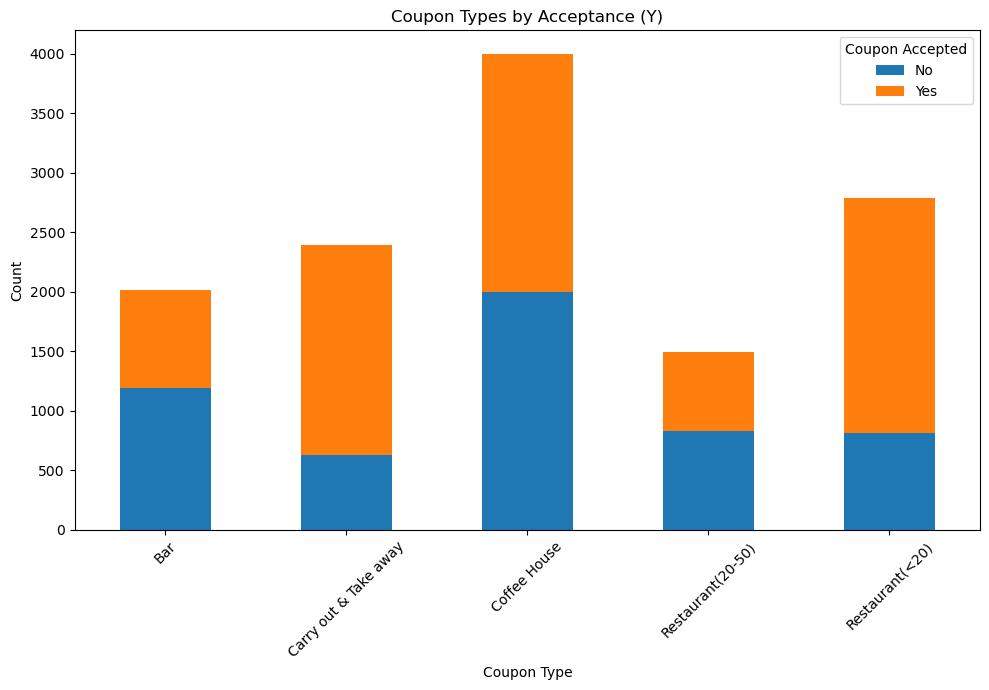

In [115]:
# Visualizing distribution of coupons  While a simple visualization works reasonably, 
# think a stacked bar plot conveys more interesting aspects of the data.  
# The bar plot shows the total counts for each coupon type, while splitting them out into accepted and declined categories
couponAcceptanceCounts = data.groupby(['coupon', 'Y']).size()
couponAcceptanceCountsPivot = couponAcceptanceCounts.unstack(fill_value=0)

couponAcceptanceCountsPivot.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Coupon Types by Acceptance (Y)')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Coupon Accepted', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

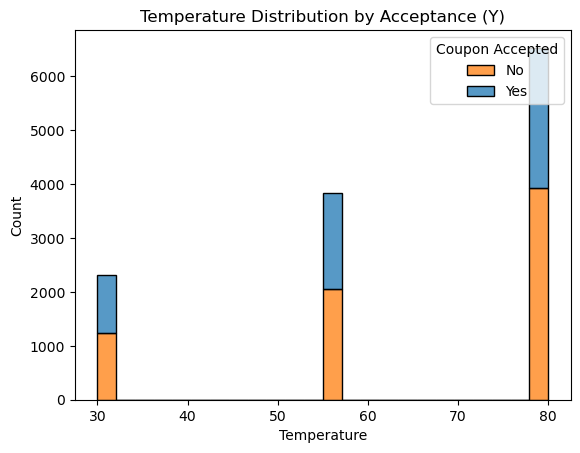

In [116]:
sns.histplot(data=data, x='temperature', hue='Y', multiple='stack')
plt.title('Temperature Distribution by Acceptance (Y)')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.legend(title='Coupon Accepted', loc='upper right', labels=['No', 'Yes'])
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [117]:
barData = data.query('coupon=="Bar"')
barData

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,ageNumeric
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,unknown,4~8,1~3,1,1,0,0,1,0,21.0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,unknown,4~8,1~3,1,0,0,1,0,1,21.0
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,unknown,4~8,1~3,1,1,1,0,1,0,21.0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,21.0
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,1,0,1,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,0,26.0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,0,26.0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,0,26.0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,0,26.0


2. What proportion of bar coupons were accepted?


In [118]:
barAcceptanceProportion = barData.query('Y==1').shape[0]/barData.shape[0]
print( f'proportion of bar observations that accepted a coupon = {barAcceptanceProportion}')

proportion of bar observations that accepted a coupon = 0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


proportion of bar observations that accepted a coupon with greater than 3 visits = 0.7688442211055276
proportion of bar observations that accepted a coupon with less than 3 visits = 0.37061769616026713


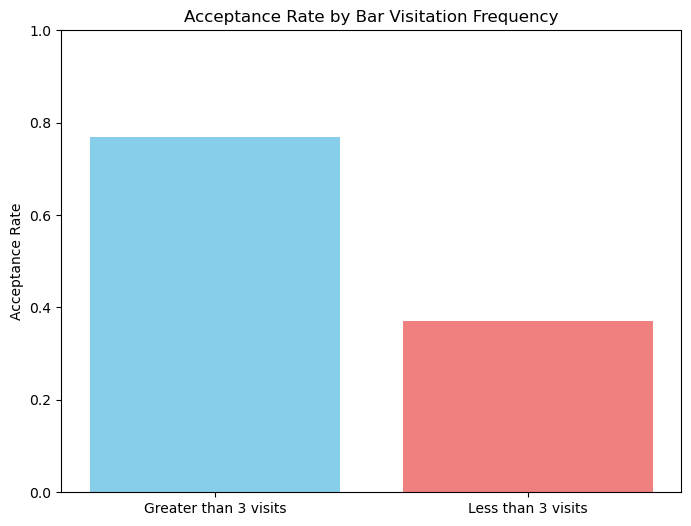

In [119]:
# Create two dataframes where one contains everything that is less than 3 visits and another that contains everything that is greater
# Keep in mind we have unknowns in it
greaterThanThreeVisits = barData.query( 'Bar in (["4~8","gt8"])')
greaterThanThreeProportion = greaterThanThreeVisits.query('Y==1').shape[0]/greaterThanThreeVisits.shape[0]

lessThanThreeVisits = barData.query( 'Bar in (["never","less1","1~3"])')
lessThanThreeProportion = lessThanThreeVisits.query('Y==1').shape[0]/lessThanThreeVisits.shape[0]


print( f'proportion of bar observations that accepted a coupon with greater than 3 visits = {greaterThanThreeProportion}')
print( f'proportion of bar observations that accepted a coupon with less than 3 visits = {lessThanThreeProportion}')

labels = ['Greater than 3 visits', 'Less than 3 visits']
proportions = [greaterThanThreeProportion, lessThanThreeProportion]

plt.figure(figsize=(8, 6))
plt.bar(labels, proportions, color=['skyblue', 'lightcoral'])
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate by Bar Visitation Frequency')
plt.ylim(0, 1) # Proportions are between 0 and 1
plt.show()


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


acceptance proportion of drivers over 25 with atleast one visit to the bar = 0.6952
acceptance proportion of drivers that are not over 25 with none or unknown number of visits to the bar = 0.3350


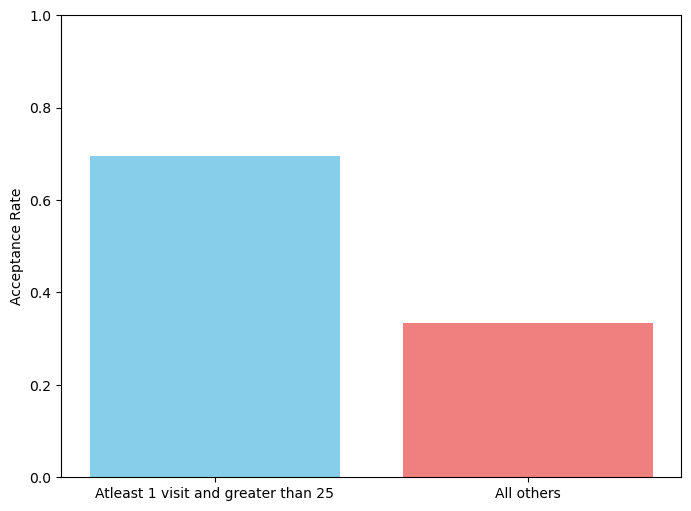

In [120]:
# Create two dataframes where one contains everything that has atleast one bar visit and over the age of 25, and all others.
# Create two dataframes where one contains everything that has atleast one bar visit and over the age of 25, and all others.
filteredGroup = barData.query('Bar not in ["unknown","never","less1"] and ageNumeric > 25')
othersGroup = barData.query('not (Bar not in ["unknown","never","less1"] and ageNumeric > 25)')

filteredGroupProportion = filteredGroup.query('Y==1').shape[0]/filteredGroup.shape[0]
otherGroupProportion = othersGroup.query('Y==1').shape[0]/othersGroup.shape[0]

print( f'acceptance proportion of drivers over 25 with atleast one visit to the bar = {filteredGroupProportion:.4f}')
print( f'acceptance proportion of drivers that are not over 25 with none or unknown number of visits to the bar = {otherGroupProportion:.4f}')


labels = ['Atleast 1 visit and greater than 25', 'All others']
proportions = [filteredGroupProportion, otherGroupProportion]

plt.figure(figsize=(8, 6))
plt.bar(labels, proportions, color=['skyblue', 'lightcoral'])
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1) # Proportions are between 0 and 1
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [121]:
takeawayGroup = data.query( 'coupon == "Carry out & Take away"')
grouped =  takeawayGroup.groupby(['gender','Y']).size().unstack(fill_value=0).reindex()
grouped['total'] = grouped[0] + grouped[1]
grouped['acceptanceRate'] = grouped[1]/(grouped[0] + grouped[1])
display(grouped)
print("The ratios seem almost the same amoung female and male drivers")

Y,0,1,total,acceptanceRate
gender,,,,
Female,355,885,1240,0.71371
Male,278,875,1153,0.75889


The ratios seem almost the same amoung female and male drivers


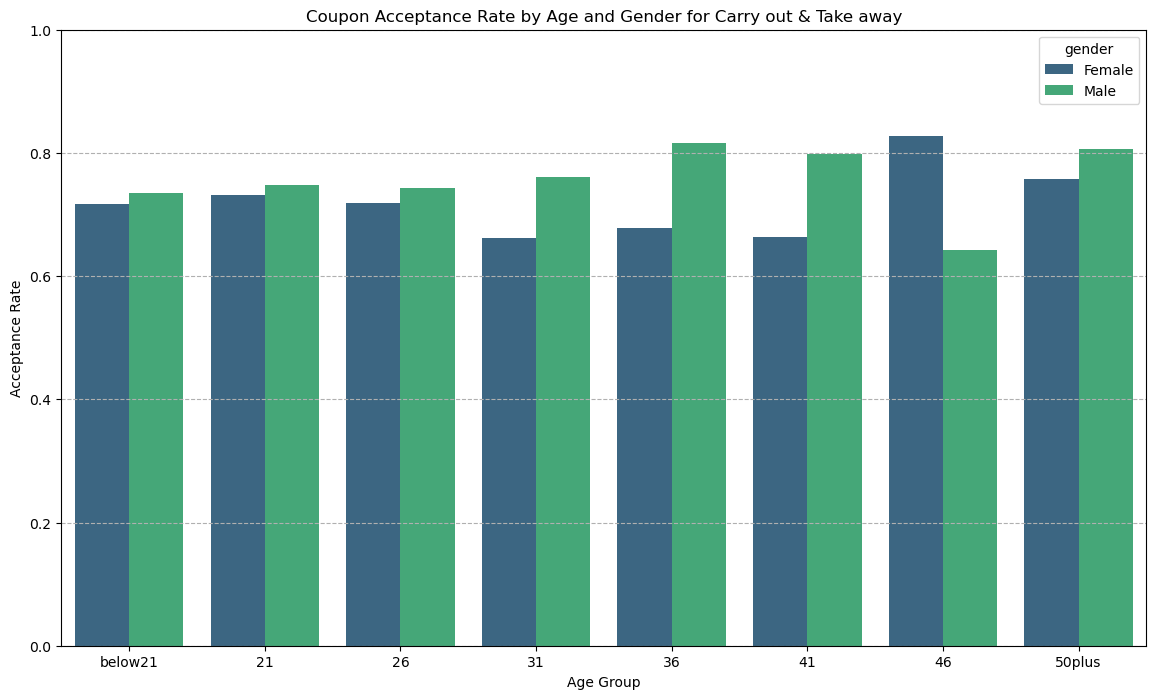

In [122]:
groupedByAgeAndGender = takeawayGroup.groupby(['gender','age','Y']).size().unstack(fill_value=0)
groupedByAgeAndGender['total'] = groupedByAgeAndGender[0] + groupedByAgeAndGender[1]
groupedByAgeAndGender['acceptanceRate'] = groupedByAgeAndGender[1]/(groupedByAgeAndGender[0] + groupedByAgeAndGender[1])
groupedByAgeAndGender = groupedByAgeAndGender.reset_index()

# Define the custom order for age groups
age_order = ['below21', '21', '26', '31', '36', '41', '46', '50plus']

plt.figure(figsize=(14, 8))
sns.barplot(data=groupedByAgeAndGender, x='age', y='acceptanceRate', hue='gender', palette='viridis', order=age_order)
plt.title('Coupon Acceptance Rate by Age and Gender for Carry out & Take away')
plt.xlabel('Age Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--')
plt.show()

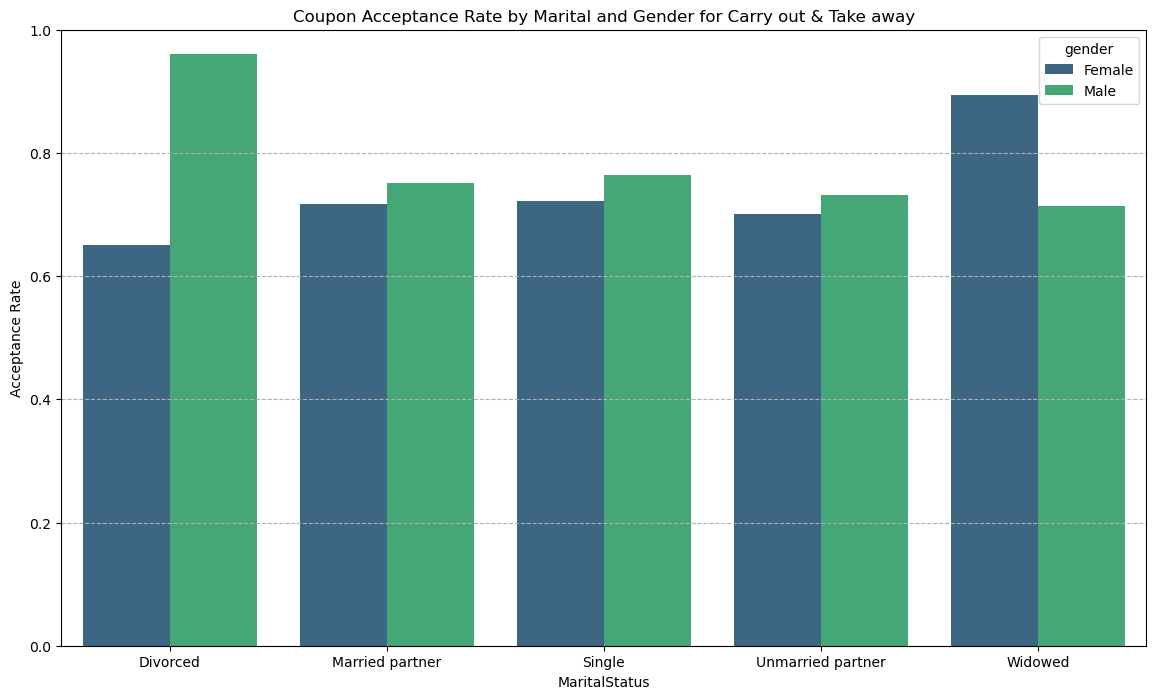

In [ ]:
groupedByMaritalStatusAndGender = takeawayGroup.groupby(['gender','maritalStatus','Y']).size().unstack(fill_value=0)
groupedByMaritalStatusAndGender['total'] = groupedByMaritalStatusAndGender[0] + groupedByMaritalStatusAndGender[1]
groupedByMaritalStatusAndGender['acceptanceRate'] = groupedByMaritalStatusAndGender[1]/(groupedByMaritalStatusAndGender[0] + groupedByMaritalStatusAndGender[1])
groupedByMaritalStatusAndGender = groupedByMaritalStatusAndGender.reset_index()


plt.figure(figsize=(14, 8))
sns.barplot(data=groupedByMaritalStatusAndGender, x='maritalStatus', y='acceptanceRate', hue='gender', palette='viridis')
plt.title('Coupon Acceptance Rate by Marital and Gender for Carry out & Take away')
plt.xlabel('MaritalStatus')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--')
plt.show()

In [128]:
#groupedByMaritalStatusAndGender = takeawayGroup.groupby(['gender','maritalStatus','Y']).size().unstack(fill_value=0)
groupedByMaritalStatusAndGender.head(20)

Y,gender,maritalStatus,0,1,total,acceptanceRate
0,Female,Divorced,29,54,83,0.650602
1,Female,Married partner,150,380,530,0.716981
2,Female,Single,107,277,384,0.721354
3,Female,Unmarried partner,67,157,224,0.700893
4,Female,Widowed,2,17,19,0.894737
5,Male,Divorced,1,24,25,0.960000
6,Male,Married partner,103,310,413,0.750605
7,Male,Single,128,416,544,0.764706
8,Male,Unmarried partner,44,120,164,0.731707
9,Male,Widowed,2,5,7,0.714286
